### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 278_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,...,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000
mean,0.040978,0.205149,0.531337,0.975738,1.307035,7.030409,1.447735,1.070331,1.024054,1.006452,...,1.784691,1.889100,1.821019,1.983642,0.922301,1.502925,1.989242,2.061671,2.015067,50.970436
std,0.013558,0.014098,0.029625,0.022224,0.011364,5.386578,0.529400,0.054241,0.003519,0.001622,...,0.031722,0.025727,0.034082,0.045074,0.080552,0.033805,0.023515,0.002609,0.002382,13.975171
min,0.006586,0.131945,0.464160,0.929102,1.223545,1.852897,1.033504,1.008734,1.016445,0.961791,...,1.645268,1.807530,1.734782,1.821189,0.478885,1.367503,1.938062,2.050155,2.007925,23.100000
25%,0.032105,0.199828,0.510202,0.963955,1.300948,3.782497,1.287867,1.049745,1.022318,1.006245,...,1.771429,1.871265,1.800294,1.979637,0.888617,1.488564,1.970013,2.061188,2.013576,39.900000
50%,0.044722,0.205280,0.521366,0.969009,1.303128,5.034354,1.330462,1.061088,1.023862,1.006708,...,1.786411,1.892200,1.818034,1.993998,0.948268,1.502474,1.983363,2.062198,2.015040,47.900000
75%,0.049550,0.212987,0.551496,0.979226,1.306062,8.599369,1.413843,1.068118,1.025365,1.007080,...,1.802888,1.905961,1.834571,2.009358,0.979431,1.522439,2.010940,2.063046,2.016443,60.000000
max,0.082561,0.248717,0.663806,1.067880,1.362972,48.881562,6.180555,1.542775,1.114912,1.076452,...,1.860832,1.967766,1.935464,2.054518,1.044054,1.589121,2.041283,2.071294,2.025405,97.100000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

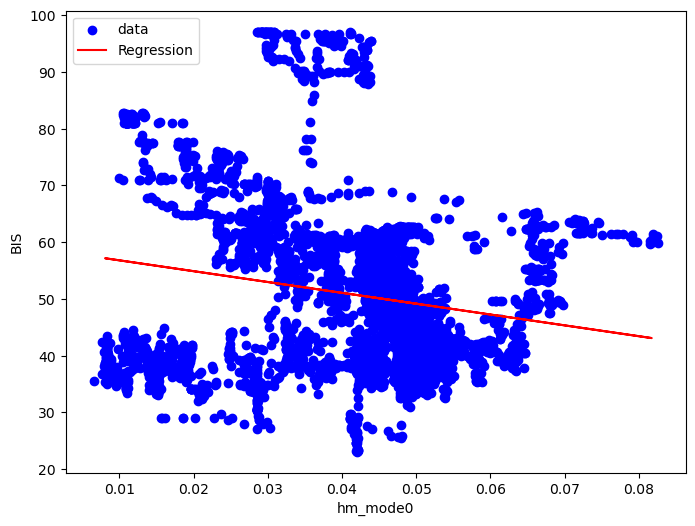

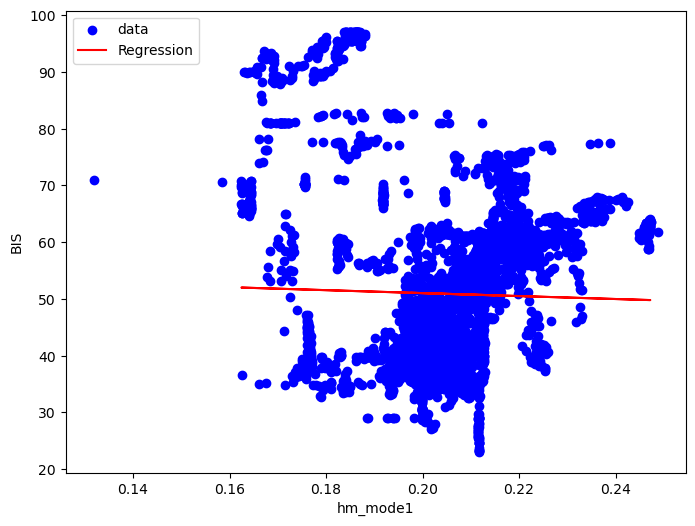

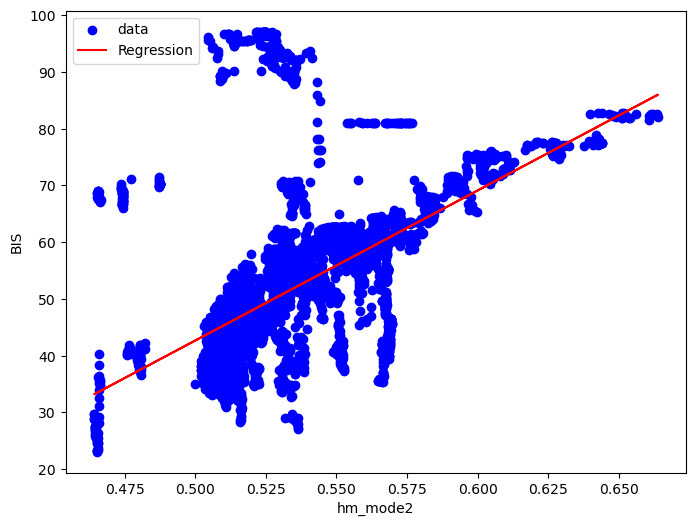

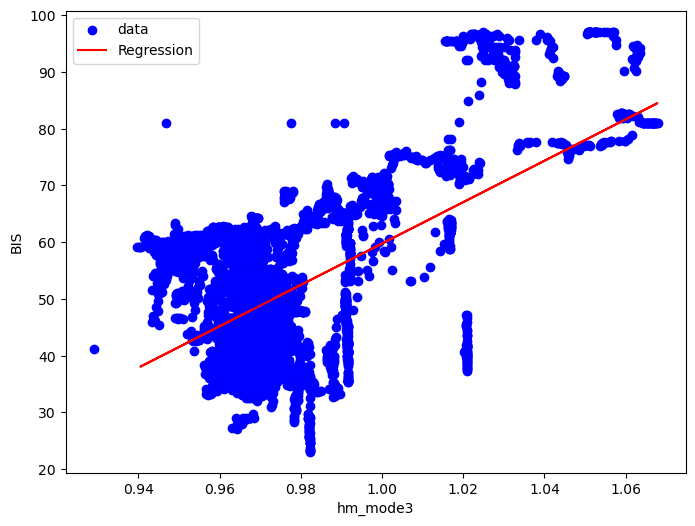

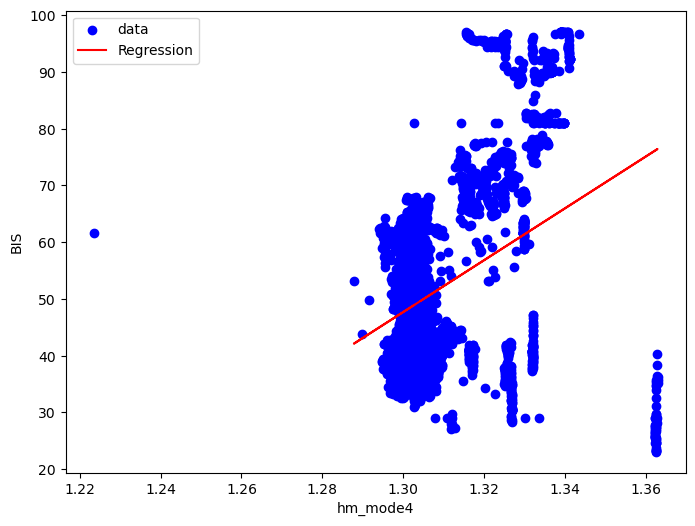

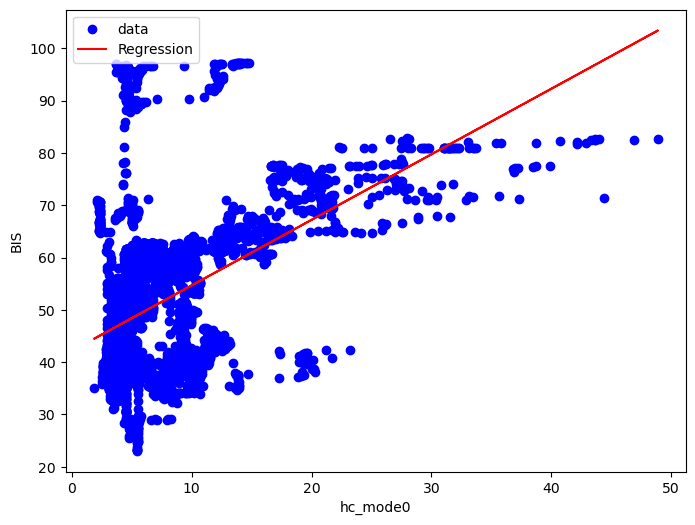

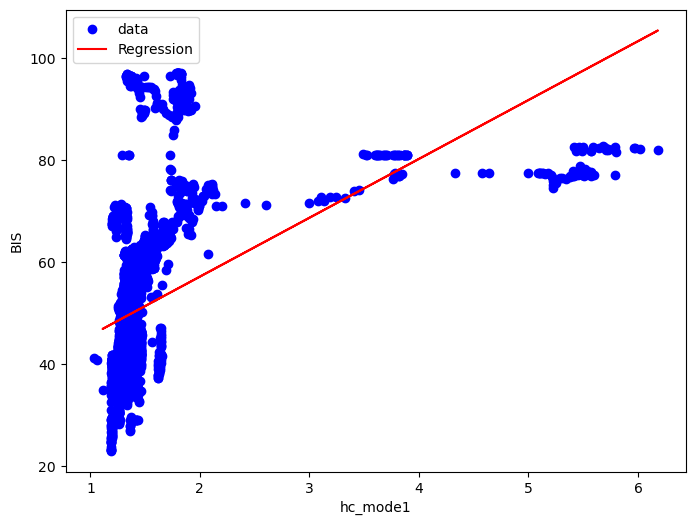

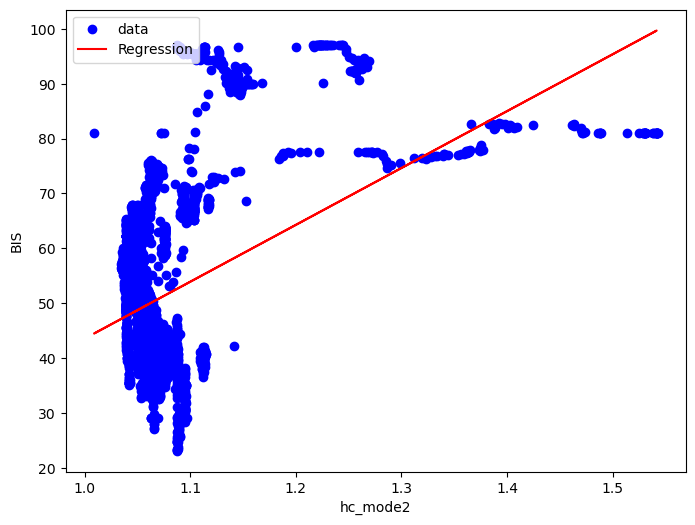

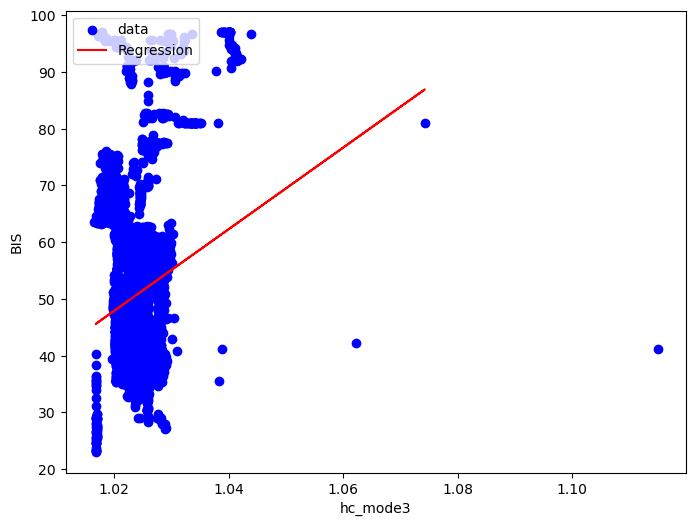

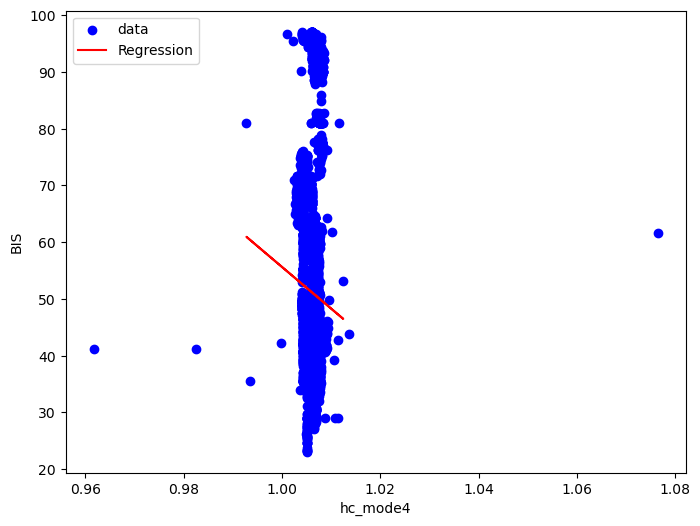

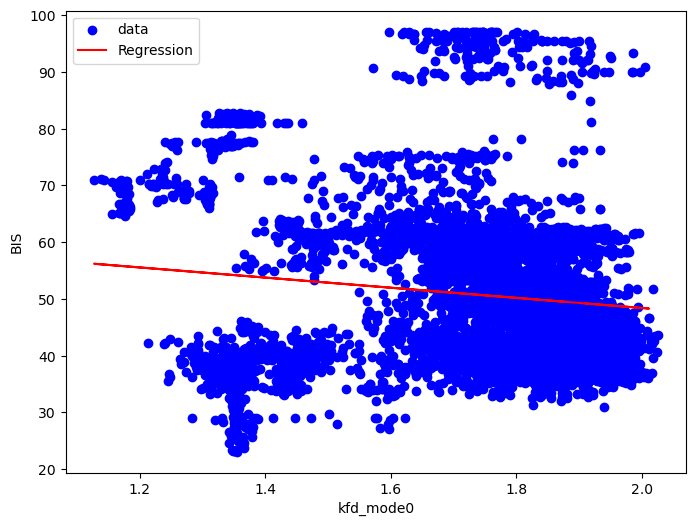

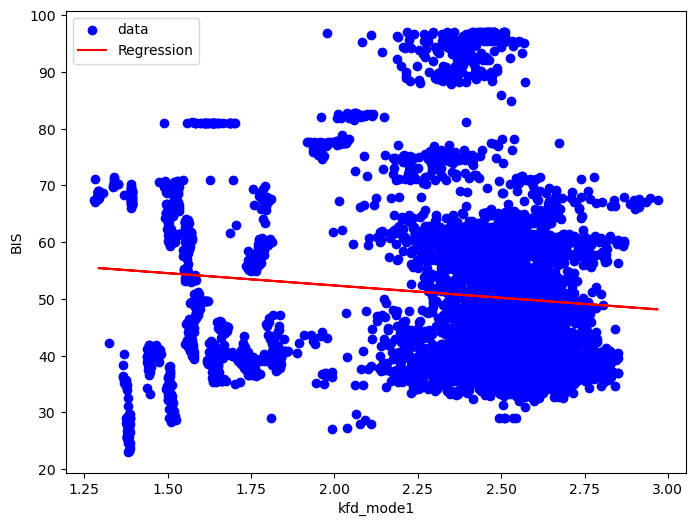

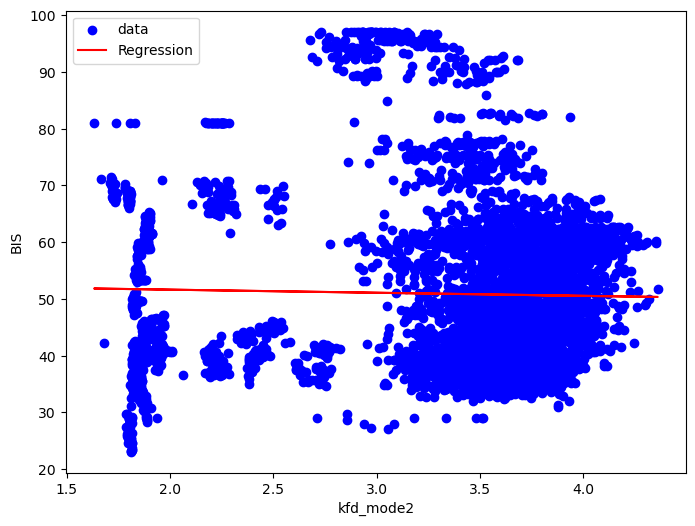

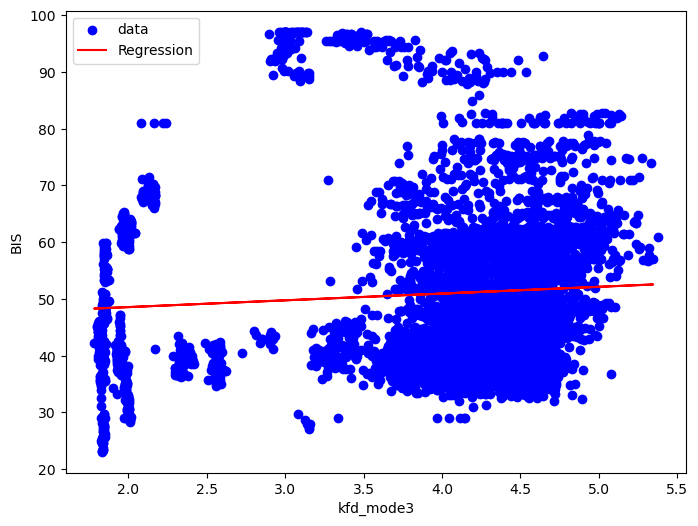

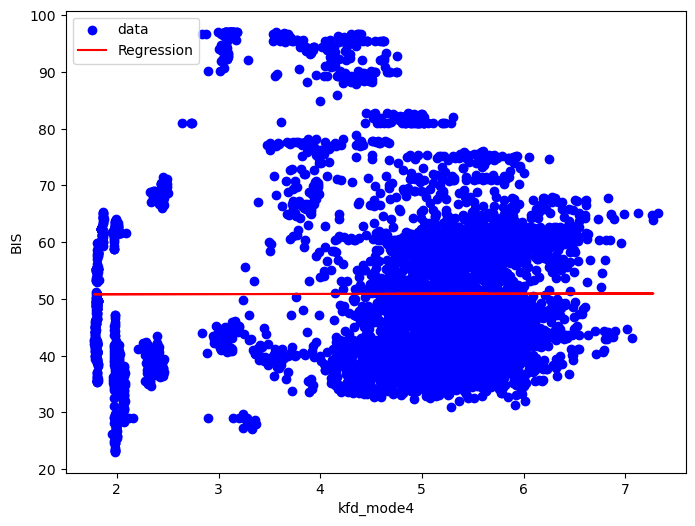

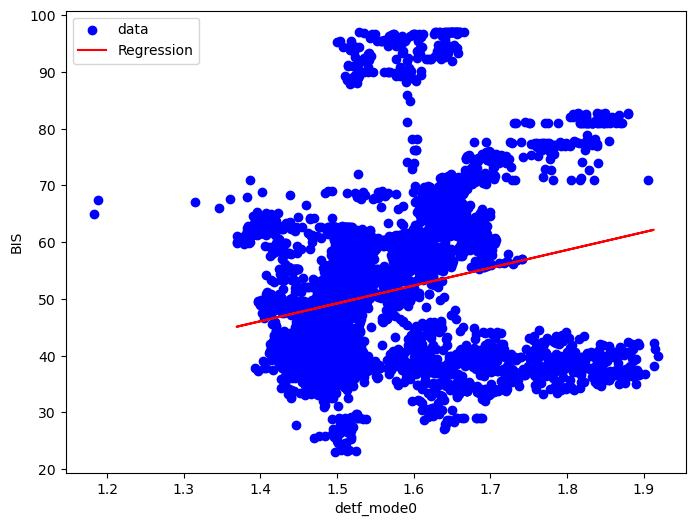

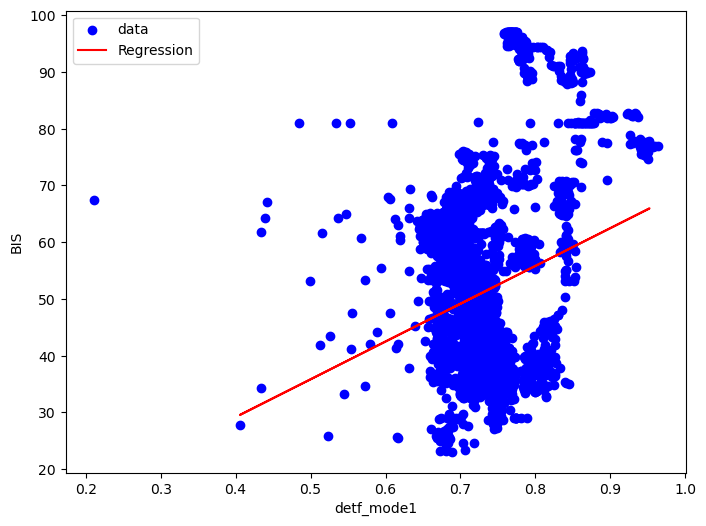

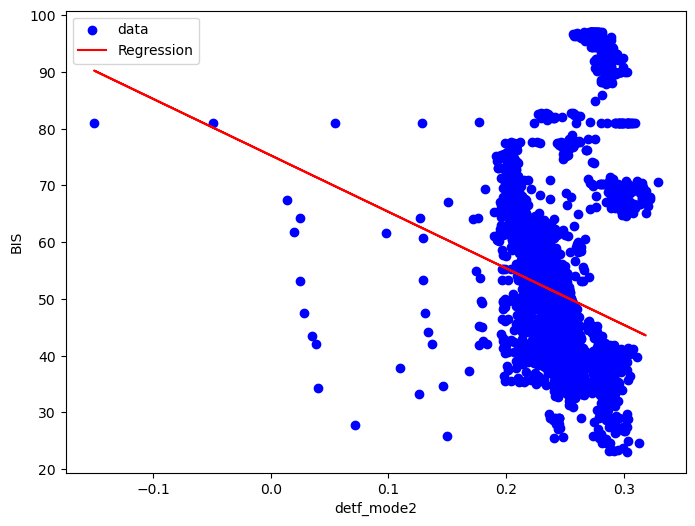

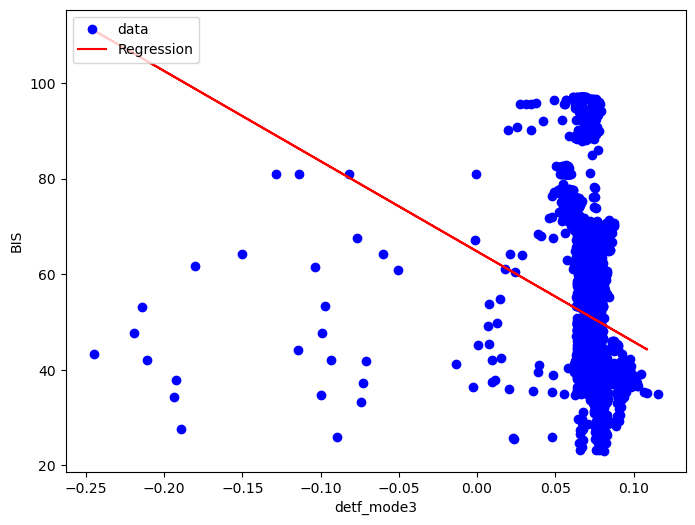

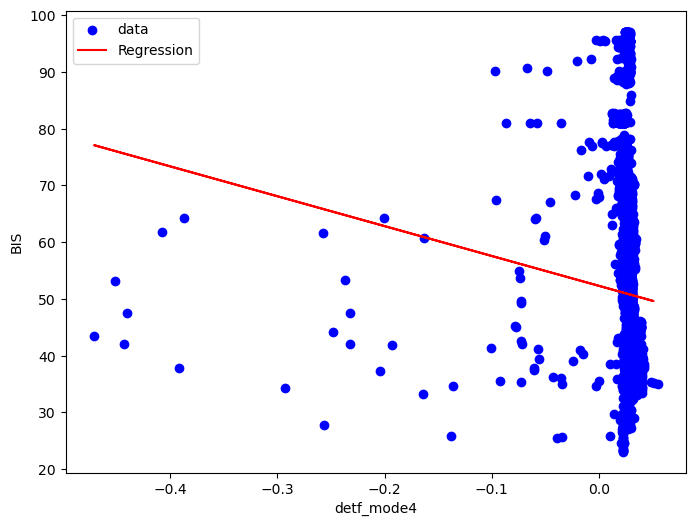

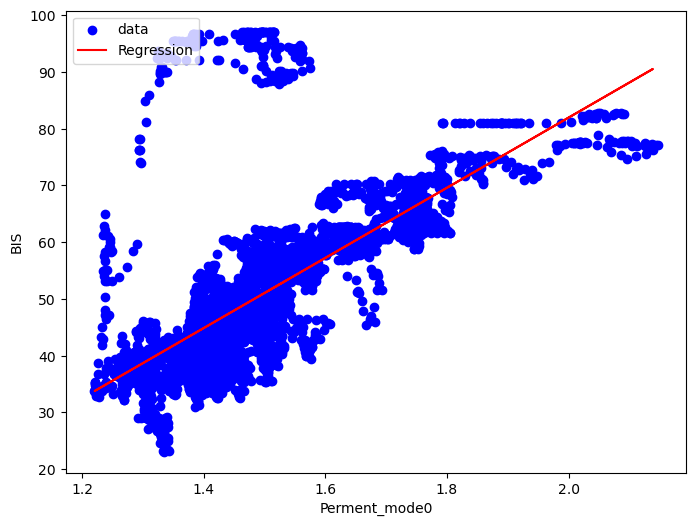

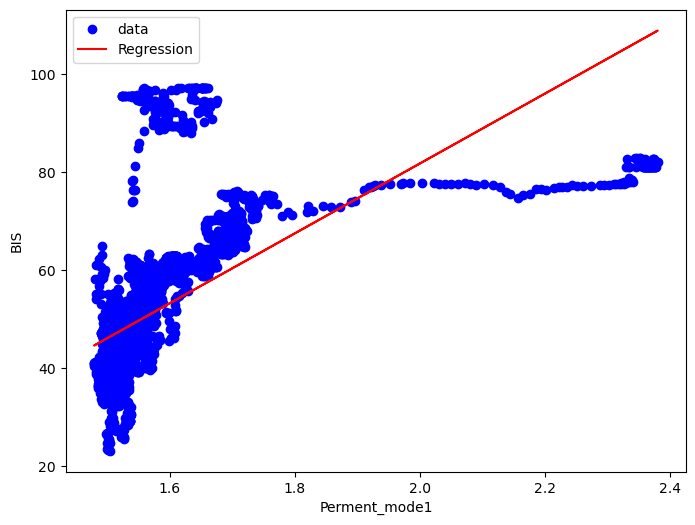

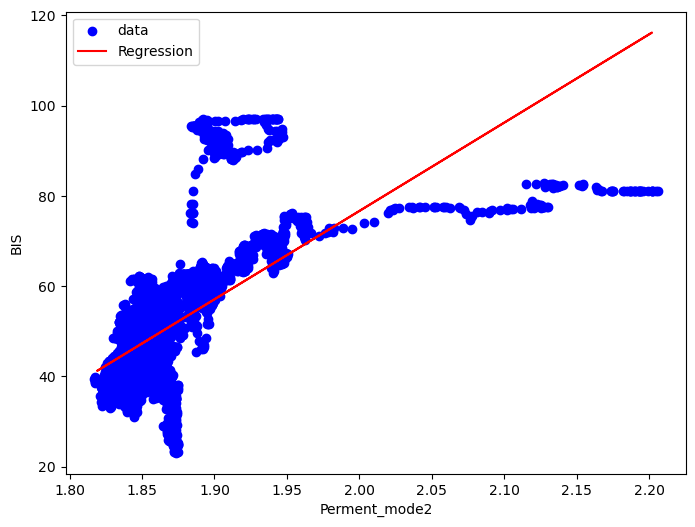

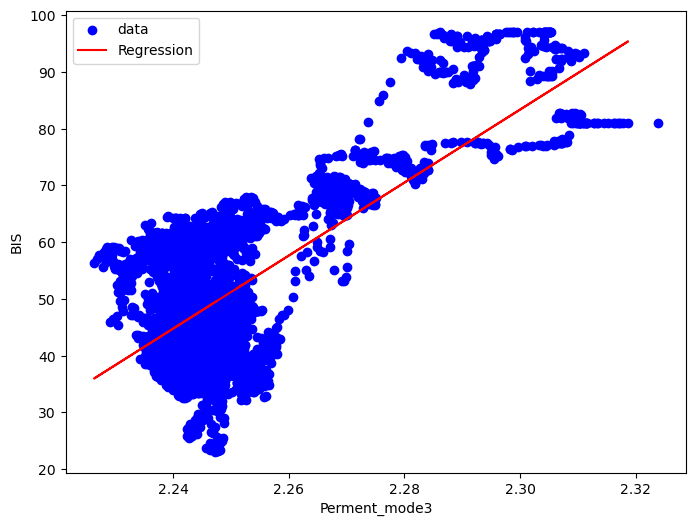

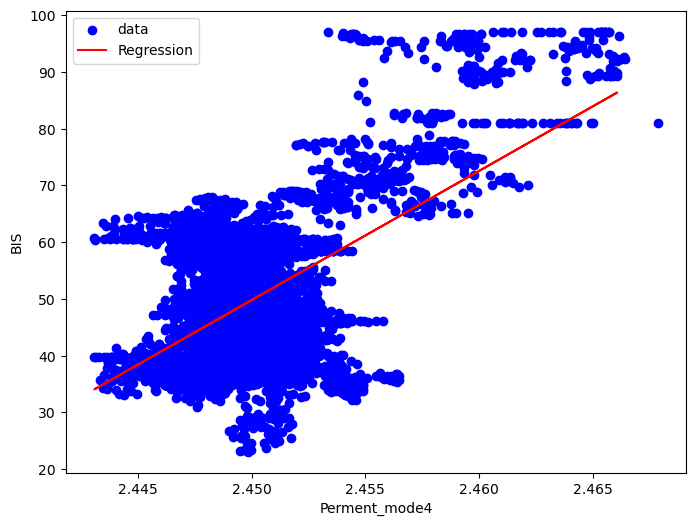

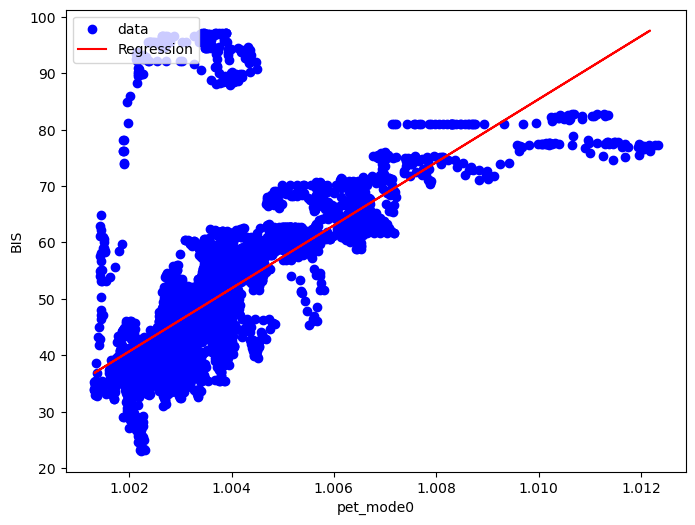

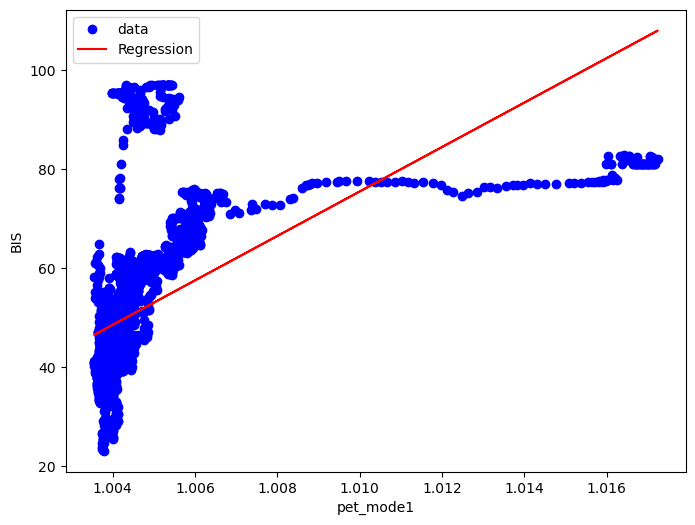

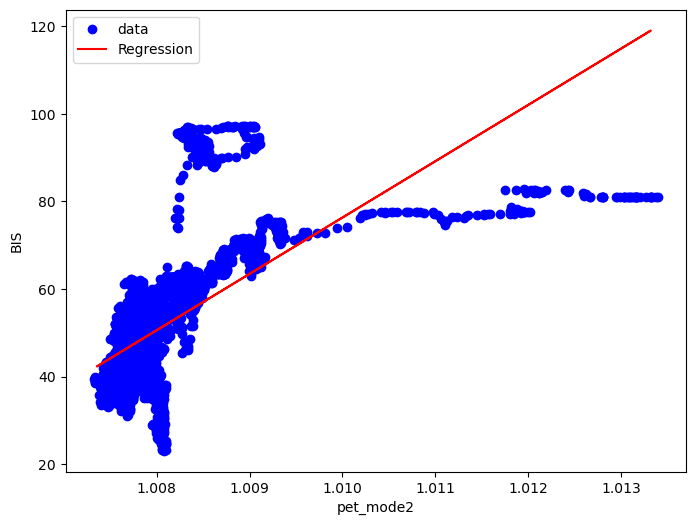

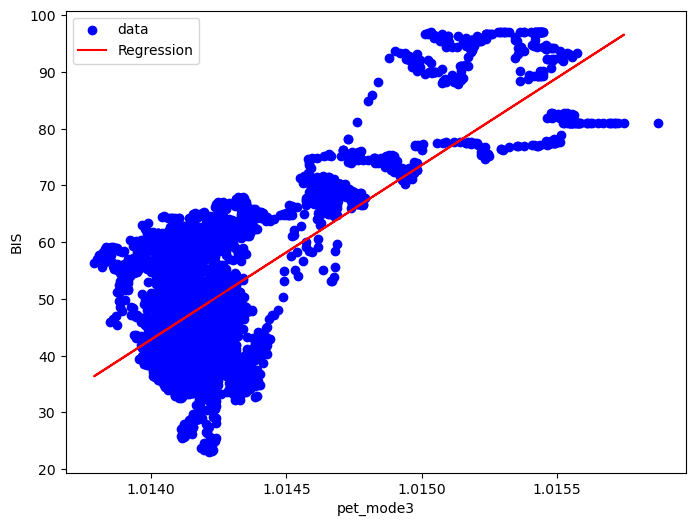

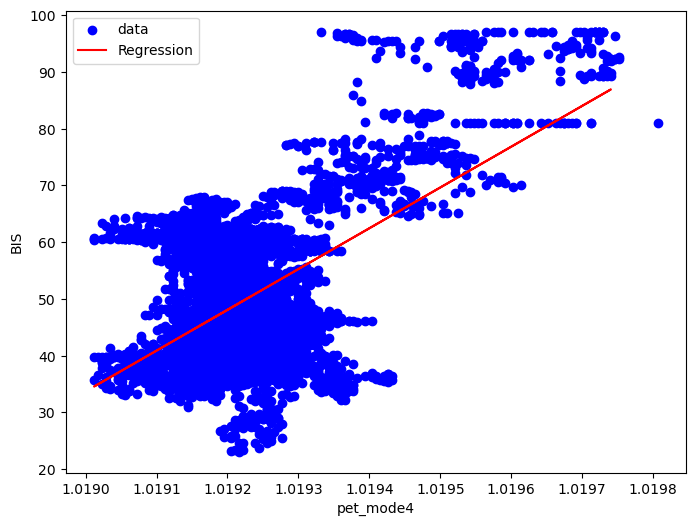

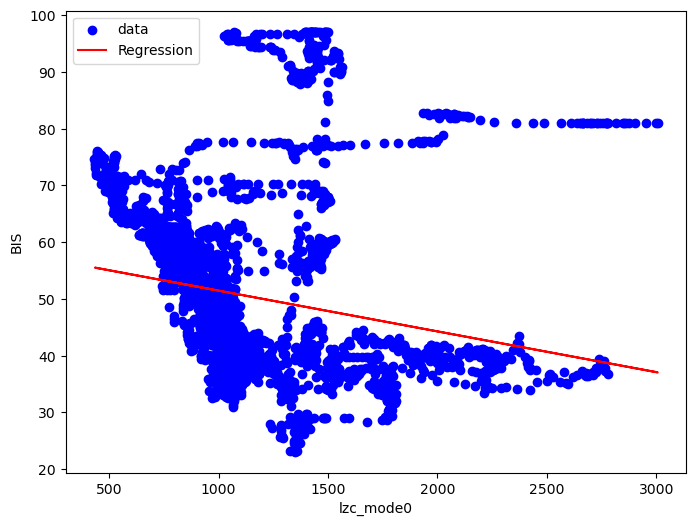

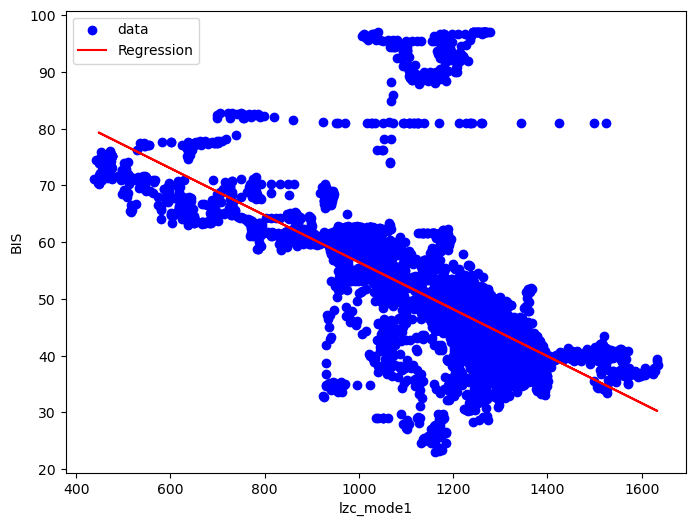

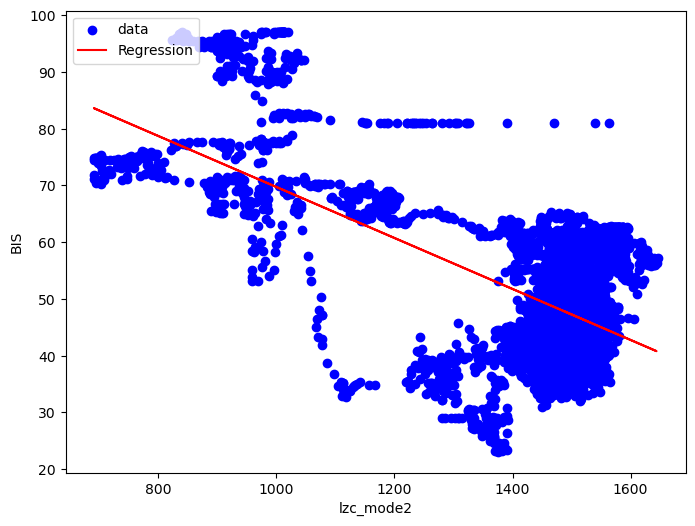

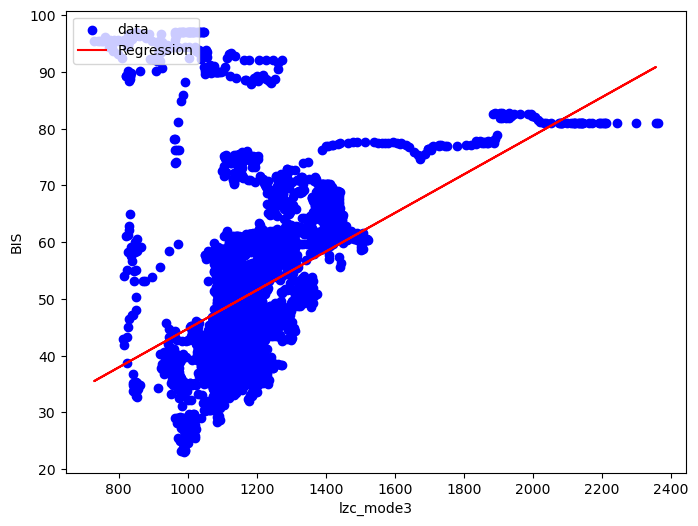

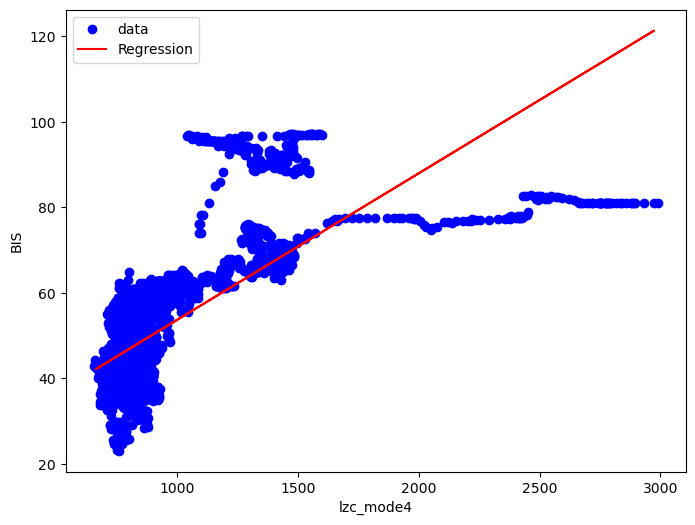

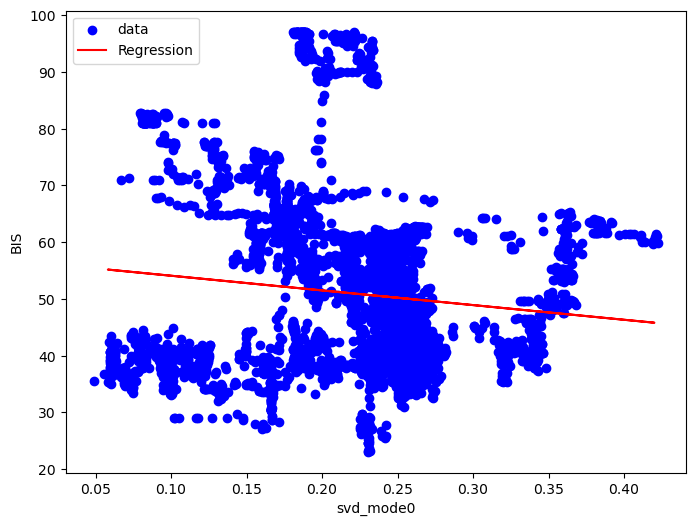

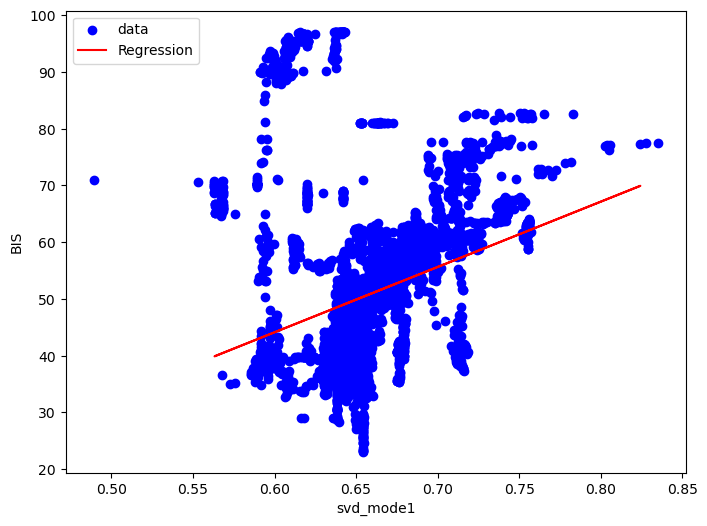

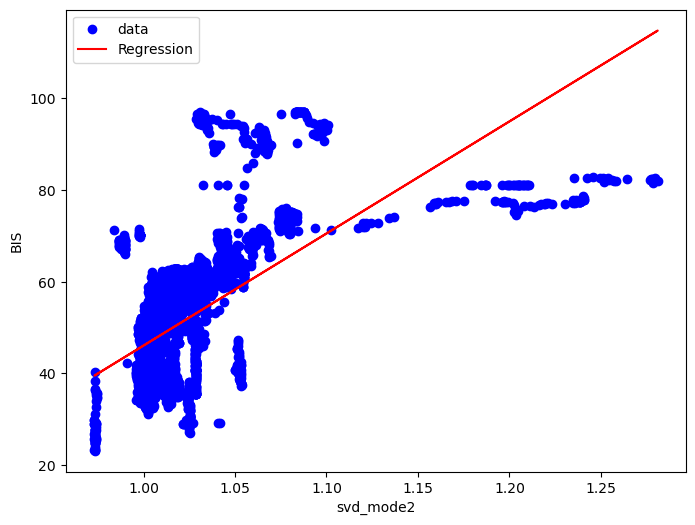

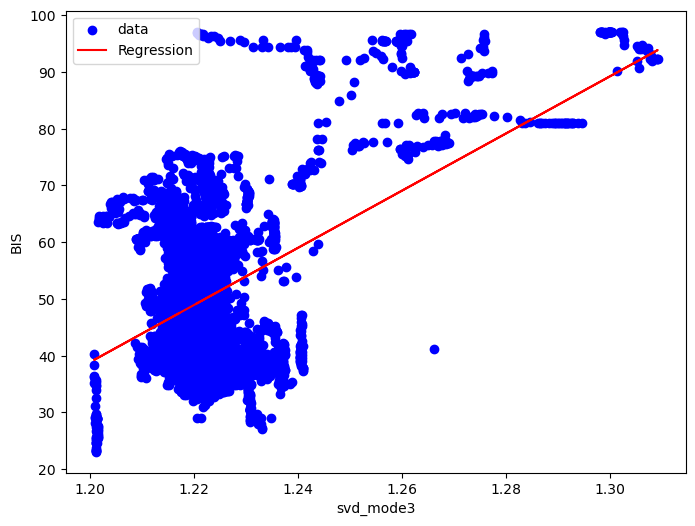

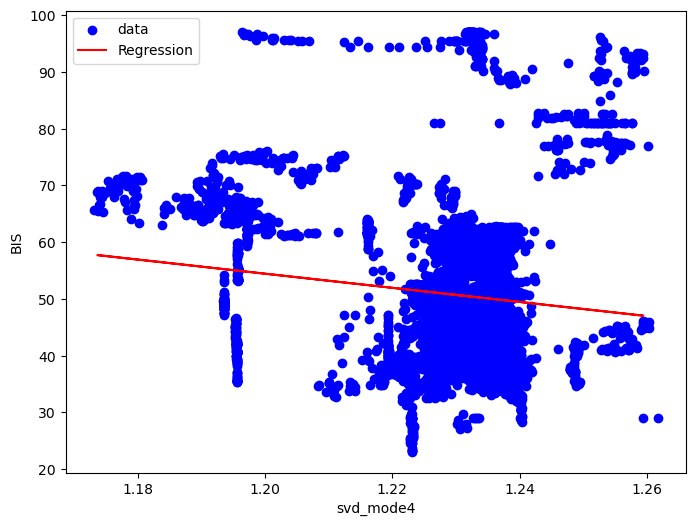

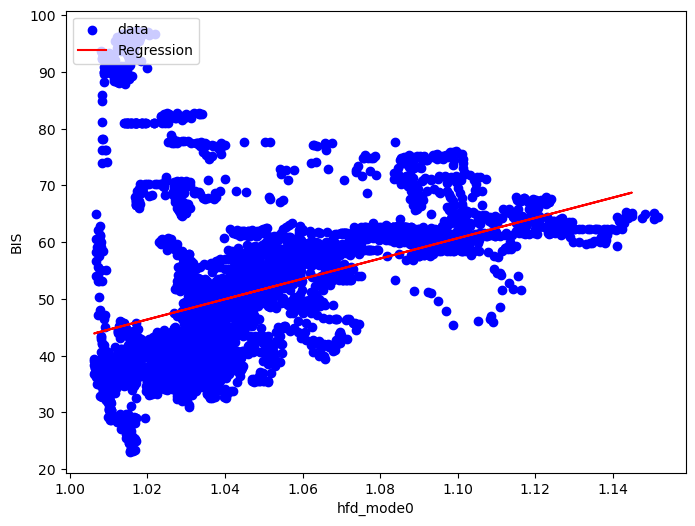

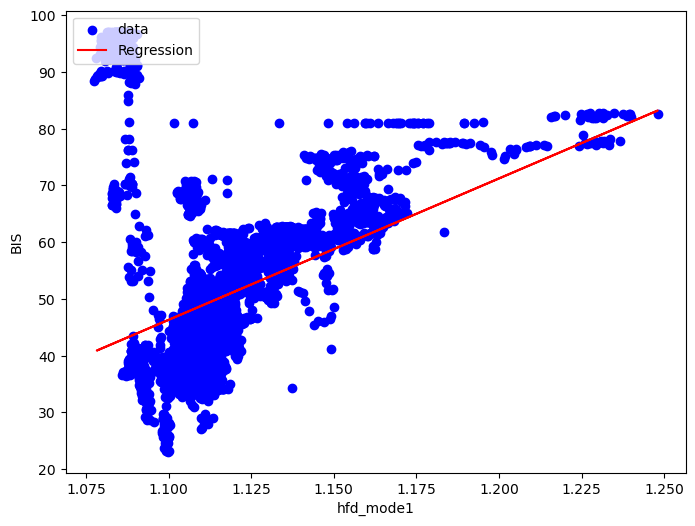

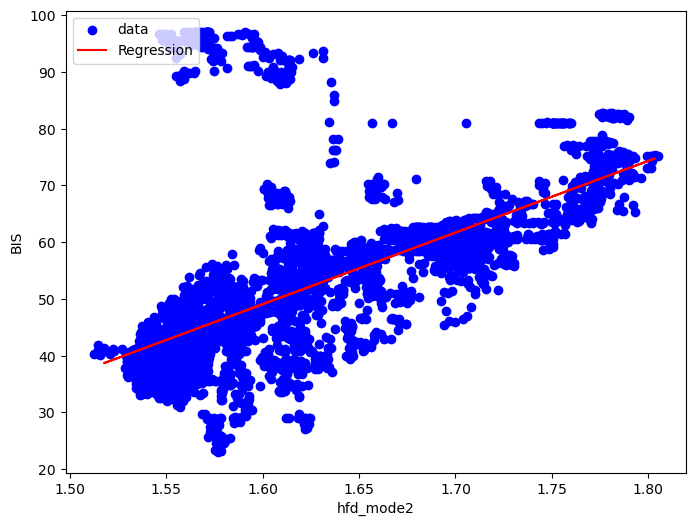

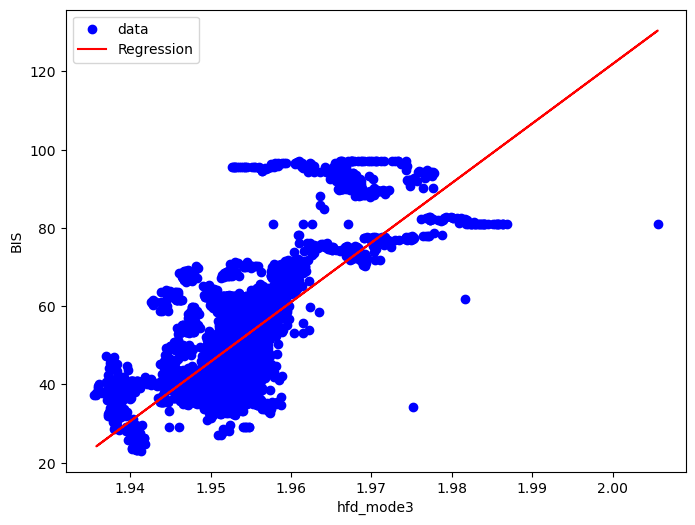

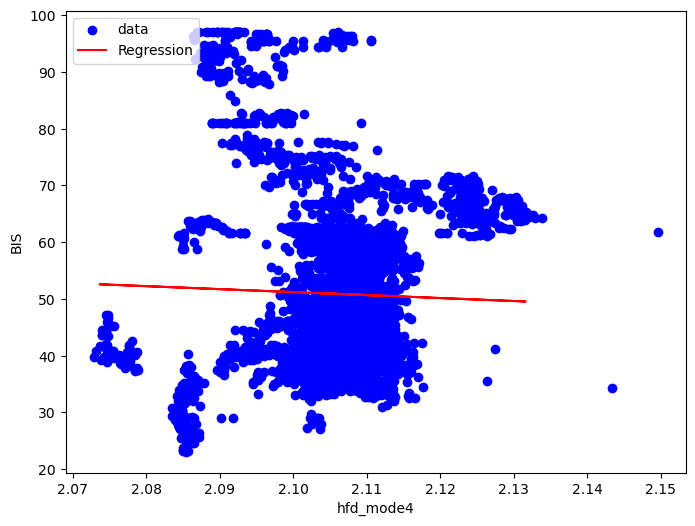

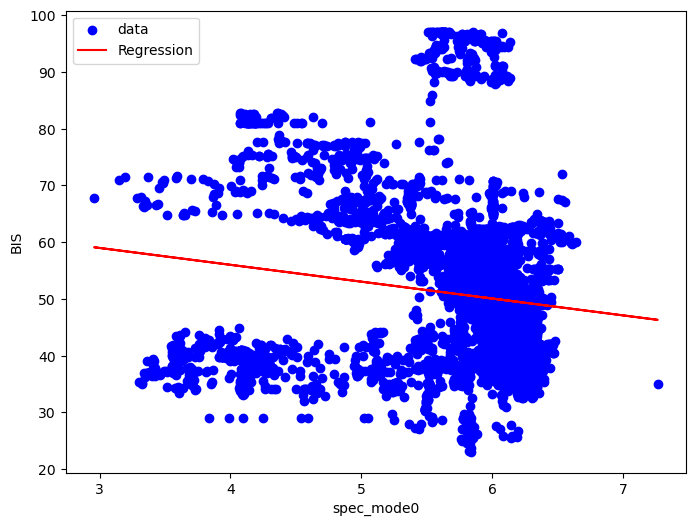

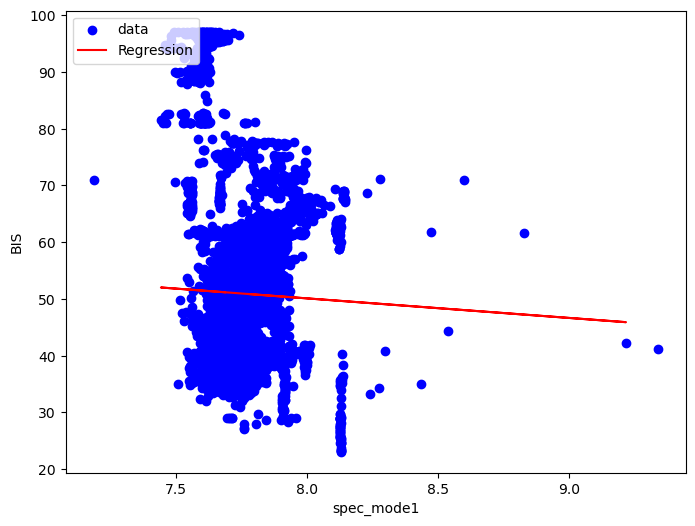

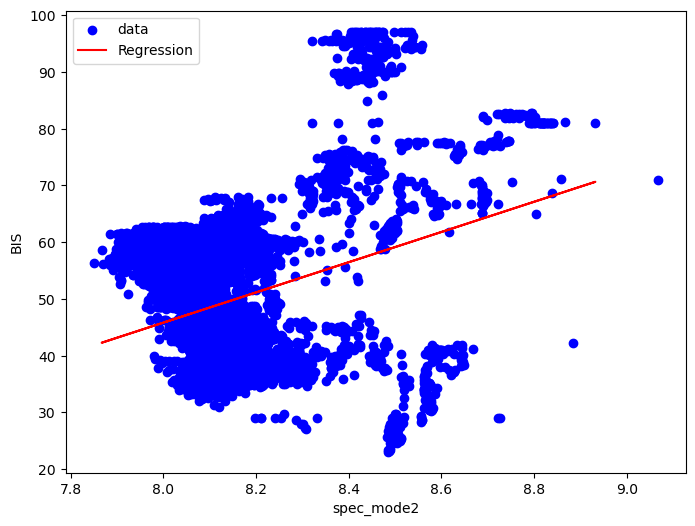

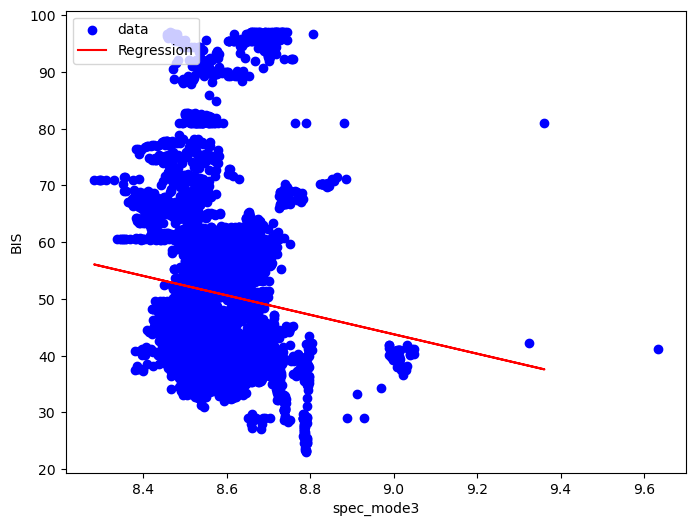

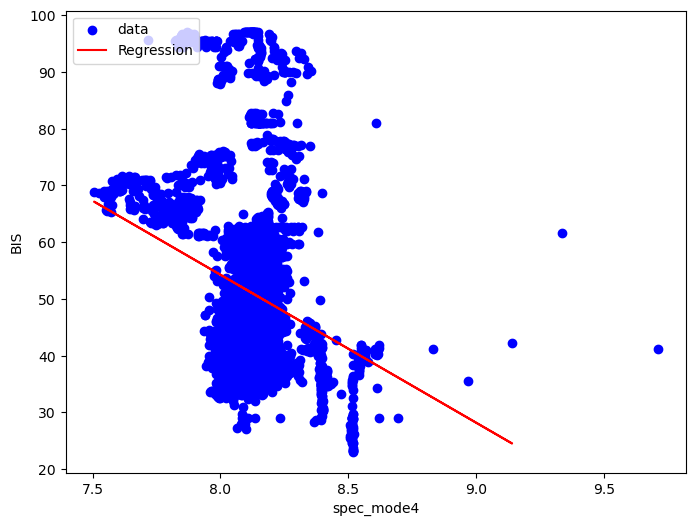

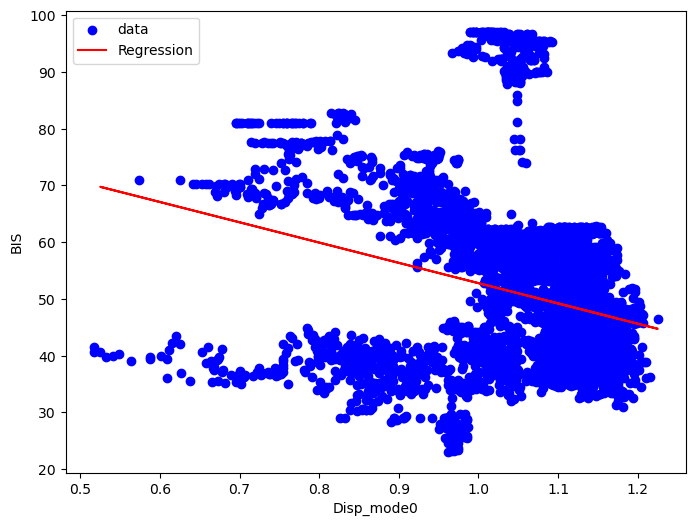

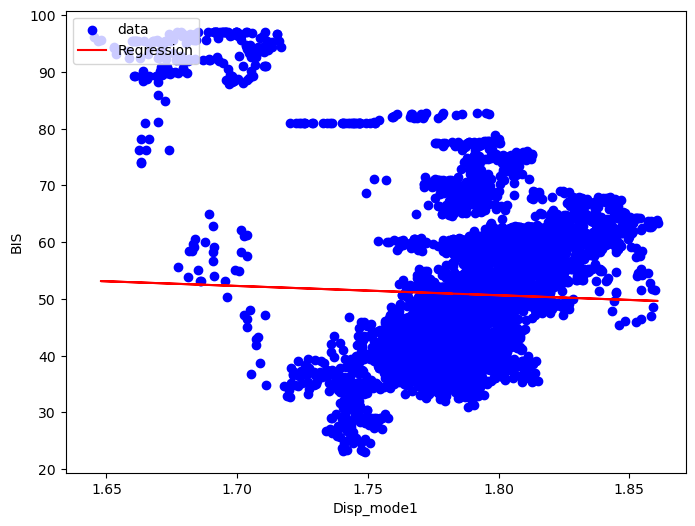

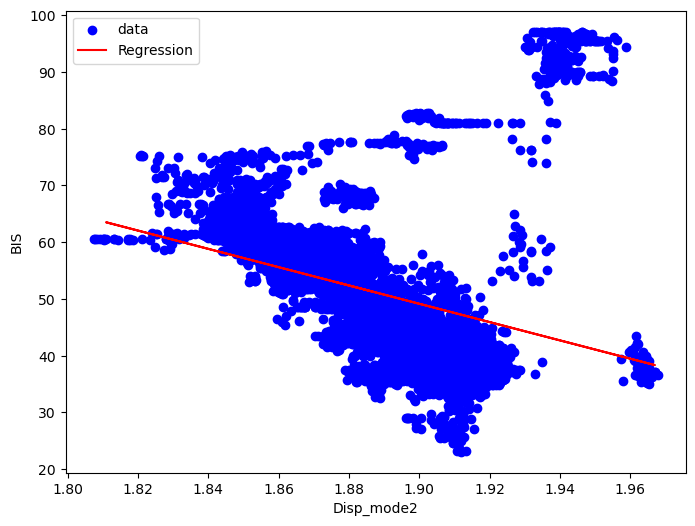

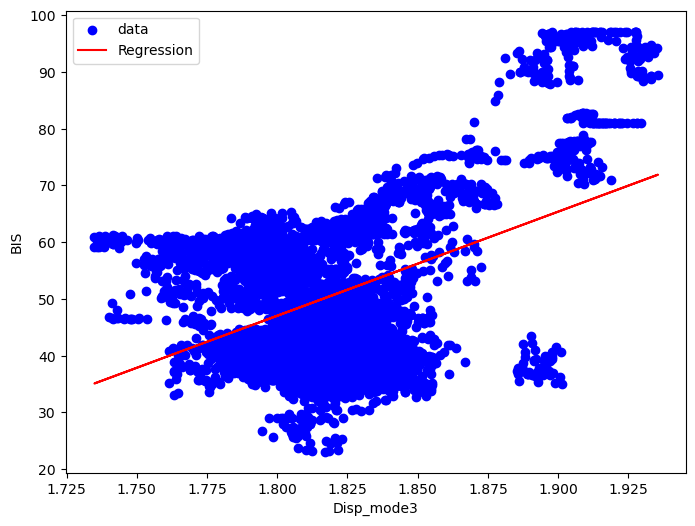

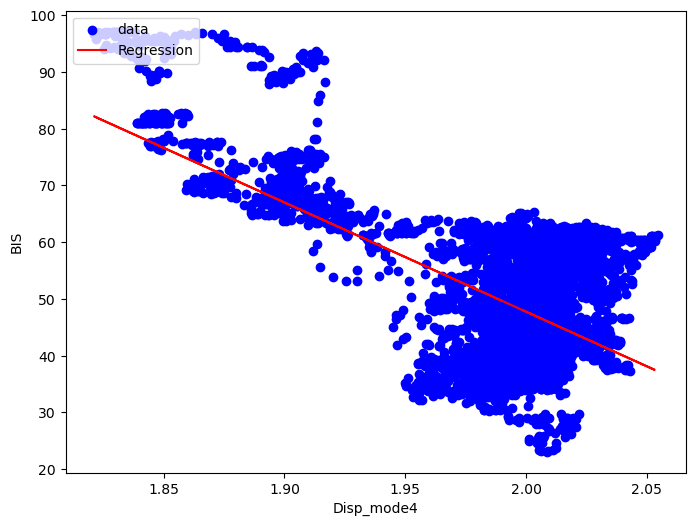

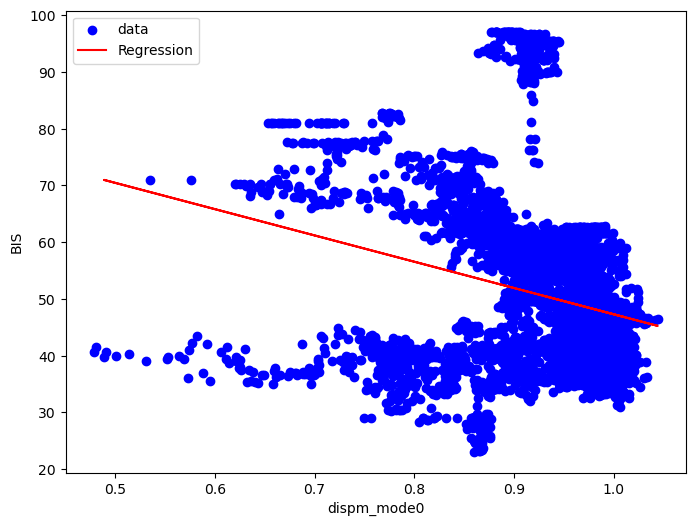

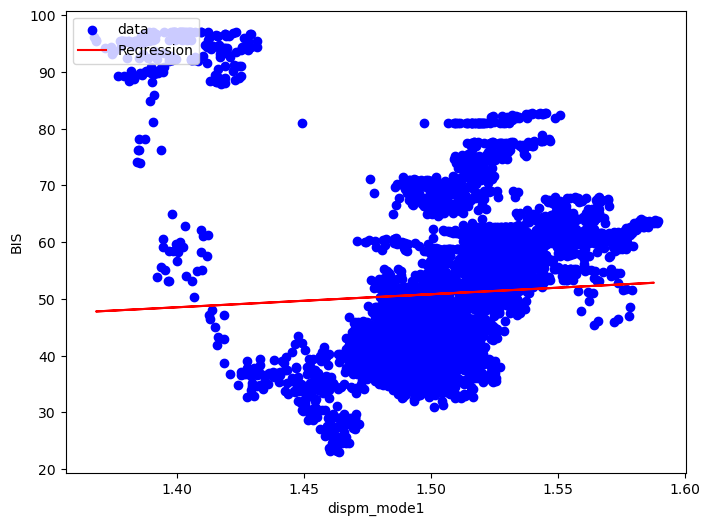

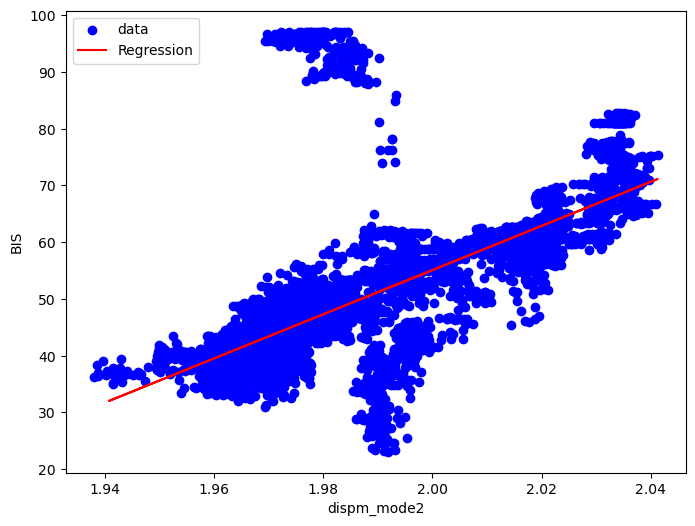

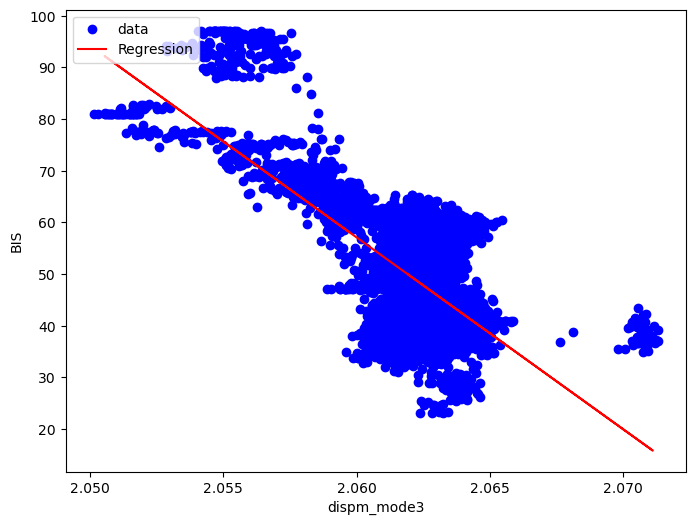

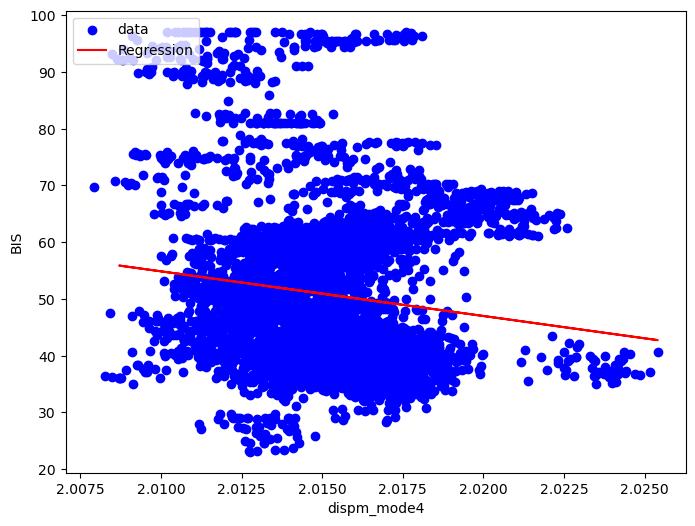

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
58,dispm_mode3_r2,47.209094
28,pet_mode3_r2,46.308865
23,Perment_mode3_r2,46.051771
43,hfd_mode3_r2,45.215357
22,Perment_mode2_r2,44.631454
34,lzc_mode4_r2,44.553782
31,lzc_mode1_r2,41.243775
27,pet_mode2_r2,41.170590
20,Perment_mode0_r2,40.978010
57,dispm_mode2_r2,40.537724


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
22  Perment_mode2    0.555005
30      lzc_mode0    0.111502
53     Disp_mode3    0.071872
23  Perment_mode3    0.054417
27      pet_mode2    0.043132
28      pet_mode3    0.024703
54     Disp_mode4    0.014112
42      hfd_mode2    0.013335
2        hm_mode2    0.012992
7        hc_mode2    0.009661
52     Disp_mode2    0.007543
8        hc_mode3    0.006614
4        hm_mode4    0.006290
21  Perment_mode1    0.006212
31      lzc_mode1    0.003414
57    dispm_mode2    0.003374
3        hm_mode3    0.002888
35      svd_mode0    0.002877
32      lzc_mode2    0.002739
51     Disp_mode1    0.002540
34      lzc_mode4    0.002401
37      svd_mode2    0.002223
16     detf_mode1    0.002144
56    dispm_mode1    0.002126
6        hc_mode1    0.002023
33      lzc_mode3    0.001731
41      hfd_mode1    0.001530
0        hm_mode0    0.001478
26      pet_mode1    0.001414
59    dispm_mode4    0.001394
36      svd_mode1    0.001368
58    dispm_mode3    0.001326
44      hf